In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-data/combined_dataset.csv


In [2]:
df=pd.read_csv(r'/kaggle/input/phishing-data/combined_dataset.csv')

In [3]:
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


* Domain: The URL itself.
* Ranking: Page Ranking
* isIp: Is there an IP address in the weblink
* valid: This data is fetched from google's whois API that tells us more about the current status of the URL's registration.
* activeDuration: Also from whois API. Gives the duration of the time since the registration up until now.
* urlLen: It is simply the length of the URL
* is@: If the link has a '@' character then it's value = 1
* isredirect: If the link has double dashes, there is a chance that it is a redirect. 1-> multiple dashes present together.
* haveDash: If there are any dashes in the domain name.
* domainLen: The length of just the domain name.
* noOfSubdomain: The number of subdomains preset in the URL.
* Labels: 0 -> Legitimate website , 1 -> Phishing Link/ Spam Link

# Exploratory data analysis(EDA)

In [4]:
df.shape

(95910, 12)

In [5]:
df.isnull().any()

domain            False
ranking           False
isIp              False
valid             False
activeDuration    False
urlLen            False
is@               False
isredirect        False
haveDash          False
domainLen         False
nosOfSubdomain    False
label             False
dtype: bool

In [6]:
df.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

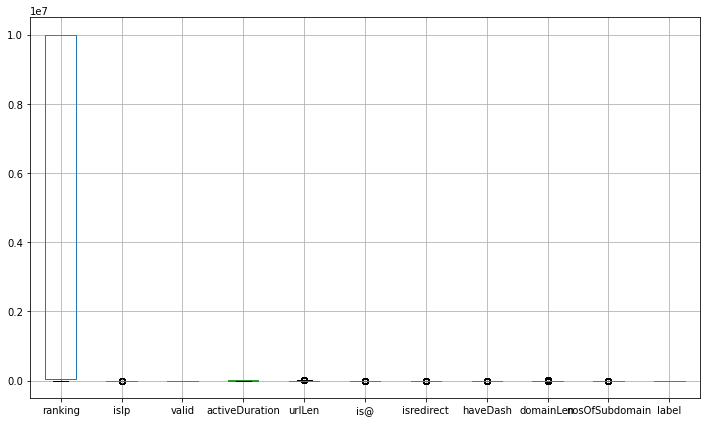

In [12]:
plt.figure(figsize=(12,7))
df.boxplot()
plt.show()

In [49]:
df['nosOfSubdomain'].value_counts()

2     54449
1     22589
3      9784
4      2366
5      1857
6      1200
12      699
8       410
10      394
9       368
11      362
7       350
13      314
14      202
18      187
15      114
17       82
16       54
19       34
24       26
20       18
21       15
23       13
22       12
0         7
27        2
26        1
34        1
Name: nosOfSubdomain, dtype: int64

<Figure size 720x432 with 0 Axes>

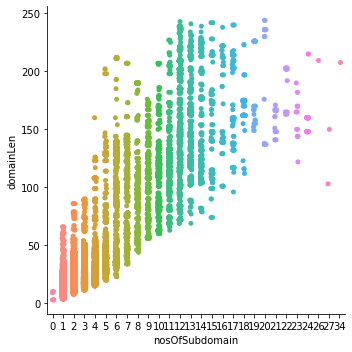

In [27]:
plt.figure(figsize=(10,6))
sns.catplot(x="nosOfSubdomain", y="domainLen", data=df)
plt.show()

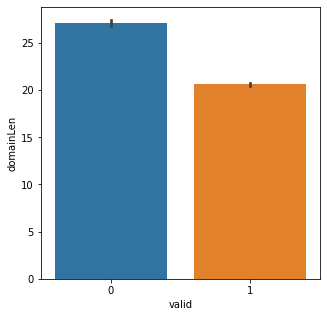

In [34]:
plt.figure(figsize=(5,5))
sns.barplot(x="valid", y="domainLen", data=df)
plt.show()

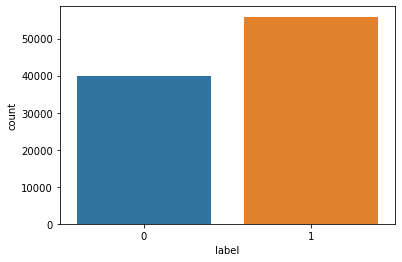

In [35]:
sns.countplot(df.label)

In [36]:
from wordcloud import WordCloud

In [37]:
train_qs = pd.Series(df['domain'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

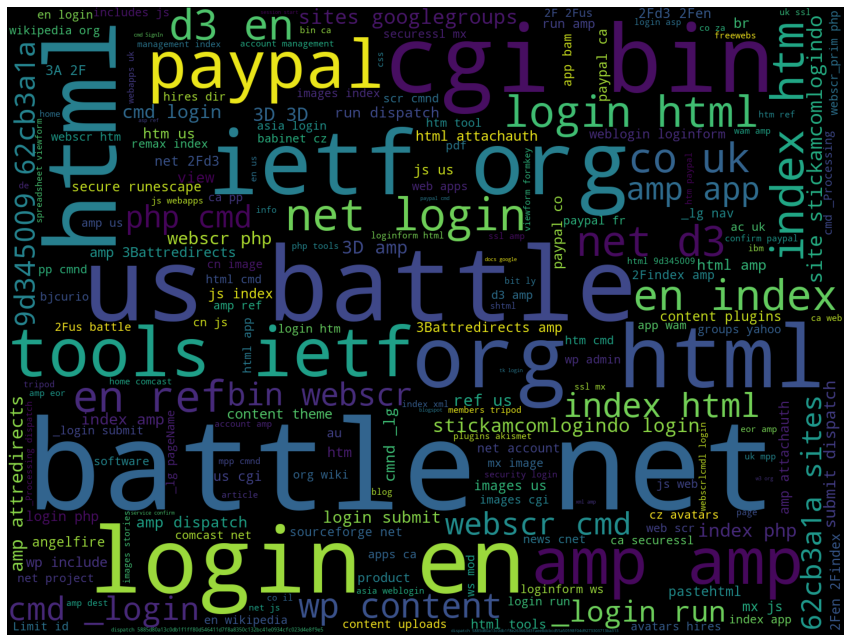

In [39]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(15, 12))
plt.imshow(cloud)
plt.axis('off')

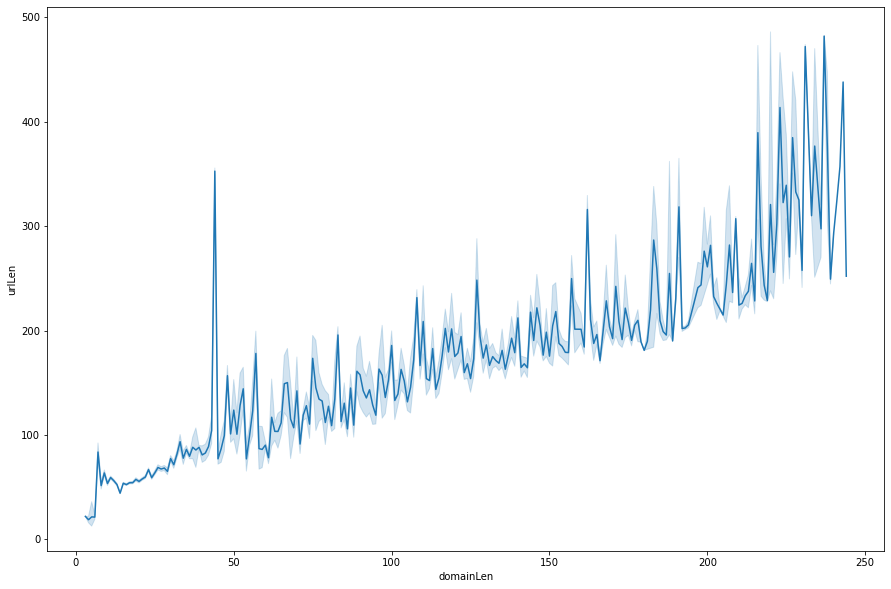

In [45]:
plt.figure(figsize=(15,10))
sns.lineplot(y=df.urlLen,x=df.domainLen,data=df)
plt.show()

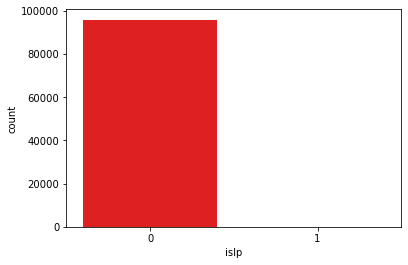

In [48]:
sns.countplot(df['isIp'],color="r")

# Model creation and training

In [50]:
cor=df.corr()
cor

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
ranking,1.000000,0.002302,-0.271810,-0.462385,0.104733,0.022798,0.059468,0.103518,0.154659,0.105718,0.516873
isIp,0.002302,1.000000,0.004698,0.000379,-0.001197,-0.000799,-0.001312,-0.002781,0.006634,0.027164,0.012811
valid,-0.271810,0.004698,1.000000,0.812531,-0.050022,-0.023917,-0.026677,-0.128651,-0.126793,-0.174061,-0.266774
activeDuration,-0.462385,0.000379,0.812531,1.000000,-0.133796,-0.026034,-0.047993,-0.150173,-0.178393,-0.178431,-0.523114
urlLen,0.104733,-0.001197,-0.050022,-0.133796,1.000000,0.017182,-0.010021,0.370280,0.497716,0.346738,0.396519
is@,0.022798,-0.000799,-0.023917,-0.026034,0.017182,1.000000,-0.004567,0.000549,-0.002268,-0.003439,0.039777
isredirect,0.059468,-0.001312,-0.026677,-0.047993,-0.010021,-0.004567,1.000000,-0.007222,-0.015948,-0.026618,0.073247
haveDash,0.103518,-0.002781,-0.128651,-0.150173,0.370280,0.000549,-0.007222,1.000000,0.365871,0.250143,0.239623
domainLen,0.154659,0.006634,-0.126793,-0.178393,0.497716,-0.002268,-0.015948,0.365871,1.000000,0.863078,0.231828
nosOfSubdomain,0.105718,0.027164,-0.174061,-0.178431,0.346738,-0.003439,-0.026618,0.250143,0.863078,1.000000,0.113249


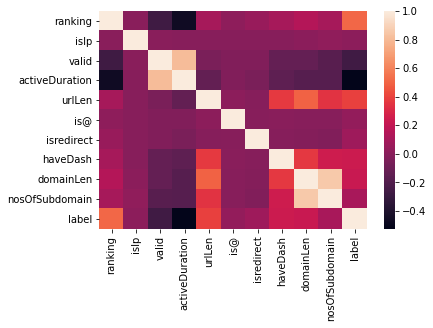

In [51]:
sns.heatmap(cor)

In [52]:
x=df.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
y=df.iloc[:,[11]]

In [53]:
x

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain
0,10000000,0,0,0,20,0,0,1,20,2
1,194914,0,1,7305,42,0,0,0,12,2
2,10000000,0,0,0,155,0,0,0,14,1
3,7001,0,0,0,35,0,0,0,18,3
4,10000000,0,1,730,79,0,0,1,14,1
...,...,...,...,...,...,...,...,...,...,...
95905,5001,0,1,8035,28,0,0,0,16,2
95906,230251,0,1,8400,47,0,0,1,27,2
95907,10000000,0,0,0,43,0,0,0,29,3
95908,2008,0,1,9862,41,0,0,0,14,2


In [54]:
y

,label
0,1
1,0
2,1
3,0
4,1
...,...
95905,0
95906,0
95907,1
95908,0


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.2)

In [56]:
print(x_train.shape)
print(x_test.shape)

(76728, 10)
(19182, 10)


## xgboost model

In [57]:
import xgboost
xgb=xgboost.XGBClassifier()

In [58]:
xgb.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
pred=xgb.predict(x_test)
pred

array([1, 0, 0, ..., 1, 1, 1])

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.9497966843916171
[[ 7424   453]
 [  510 10795]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7877
           1       0.96      0.95      0.96     11305

    accuracy                           0.95     19182
   macro avg       0.95      0.95      0.95     19182
weighted avg       0.95      0.95      0.95     19182



## support vestor machine

In [62]:
from sklearn import svm
s=svm.SVC()

In [63]:
s.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [65]:
pre=s.predict(x_test)
pre

array([1, 0, 1, ..., 1, 1, 1])

In [66]:
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))
print(classification_report(pre,y_test))

0.7665519758106558
[[5480 2024]
 [2454 9224]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      7504
           1       0.82      0.79      0.80     11678

    accuracy                           0.77     19182
   macro avg       0.76      0.76      0.76     19182
weighted avg       0.77      0.77      0.77     19182



### so in the above taken two algorithms xgboost is best with accuracy and f1_score around ~95